In [3]:
import pandas as pd

# Load the risk assessment data
data = [
    {
        "Risk_ID": "ARCH-PERFORMANCE-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "PERFORMANCE",
        "Description": "FAISS on disk could become a bottleneck for large datasets, impacting search speed.",
        "Rationale": "Scalability considerations mention 'FAISS on Disk: Avoids RAM overload when scaling beyond 5K recipes', implying potential performance issues."
    },
    {
        "Risk_ID": "ARCH-DEPLOYMENT-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "DEPLOYMENT",
        "Description": "Deploying and managing separate components (PostgreSQL, FAISS, FastAPI) on the cloud introduces complexity.",
        "Rationale": "Deployment plan involves multiple services (AWS/GCP, EC2, Google Cloud Run), increasing deployment complexity."
    },
    {
        "Risk_ID": "ARCH-MAINTAIN-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "MAINTAINABILITY",
        "Description": "Maintaining embeddings and database consistency may become complex over time.",
        "Rationale": "Separate storage for FAISS embeddings and PostgreSQL data requires careful synchronization during maintenance."
    },
    {
        "Risk_ID": "ARCH-QUALITY-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "QUALITY",
        "Description": "Insufficient testing of the LLM integration could lead to unpredictable results.",
        "Rationale": "The architecture includes LLM integration as a fallback, but testing details are not specified, posing a quality risk."
    },
    {
        "Risk_ID": "CODE-DB-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "QUALITY",
        "Description": "Insufficient validation in `db_push.py` may lead to data integrity issues.",
        "Rationale": "The script mentions 'Validate the csv rows' but doesn't detail thorough validation, increasing the risk of bad data entering the database."
    },
    {
        "Risk_ID": "CODE-PERF-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "PERFORMANCE",
        "Description": "Large datasets in `create_faiss_index.py` could cause memory issues during embedding creation.",
        "Rationale": "The script loads data from the DB and creates embeddings, which can be memory-intensive for large datasets."
    },
    {
        "Risk_ID": "CODE-DEPLOY-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "DEPLOYMENT",
        "Description": "Hardcoded paths in `config_reader.py` may cause deployment failures.",
        "Rationale": "The script uses a hardcoded path: `BASE_PATH = os.path.expanduser(\"~/Desktop\")`, which might not be valid in different environments."
    },
    {
        "Risk_ID": "CODE-SECURITY-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "SECURITY",
        "Description": "Storing the Unsplash API key directly in `fetch_images.py` poses a security risk.",
        "Rationale": "The script directly stores the Unsplash API key: `ACCESS_KEY = config_dict.get(\"unsplash_access_key\", '')`, which could be exposed."
    },
    {
        "Risk_ID": "GANTT-PLANNING-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "PLANNING",
        "Description": "The Gantt chart lacks detail, potentially leading to scheduling issues.",
        "Rationale": "The Gantt chart provides a high-level overview but lacks specific task dependencies and timelines."
    }
]

# Create DataFrame
df = pd.DataFrame(data)

# Extract SDLC phase from Risk_ID
df['SDLC_Phase'] = df['Risk_ID'].apply(lambda x: x.split('-')[0])

# Create a numerical Severity Score
severity_order = {"Low": 1, "Medium": 2, "High": 3}  # Map "High" to 3, "Medium" to 2, "Low" to 1
df['Severity_Score'] = df['Severity'].map(severity_order)

# 1. Pie Chart Data
pie_data = df.groupby('Severity').size().reset_index(name='Risk_Count')
pie_data['Percentage'] = pie_data['Risk_Count'] / pie_data['Risk_Count'].sum()

# 2. Bar Chart Data
bar_data = df.groupby('SDLC_Phase').size().reset_index(name='Risk_Count')

# 3. Heatmap Data
heatmap_data = df.groupby(['Likelihood', 'Impact']).size().reset_index(name='Risk_Count')
heatmap_data = heatmap_data.pivot(index='Likelihood', columns='Impact', values='Risk_Count').fillna(0)

# 4. Stacked Bar Chart Data
stacked_bar_data = df.groupby(['SDLC_Phase', 'Risk_Type']).size().reset_index(name='Risk_Count')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| Risk_ID             | Severity   | Likelihood   | Impact   | Risk_Type       | Description                                                                                                 | Rationale                                                                                                                                      | SDLC_Phase   | Severity_Score   |
|:--------------------|:-----------|:-------------|:---------|:----------------|:------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------|:-------------|:-----------------|
| ARCH-PERFORMANCE-01 | Medium     | 3            | 3        | PERFORMANCE     | FAISS on disk could become a bottleneck for large datasets, impacting search speed.                         | Scalability considerations mention 'FAISS on Disk: Avoids RAM overloa

In [4]:
import pandas as pd

# Load the risk assessment data
data = [
    {
        "Risk_ID": "ARCH-PERFORMANCE-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "PERFORMANCE",
        "Description": "FAISS on disk could become a bottleneck for large datasets, impacting search speed.",
        "Rationale": "Scalability considerations mention 'FAISS on Disk: Avoids RAM overload when scaling beyond 5K recipes', implying potential performance issues."
    },
    {
        "Risk_ID": "ARCH-DEPLOYMENT-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "DEPLOYMENT",
        "Description": "Deploying and managing separate components (PostgreSQL, FAISS, FastAPI) on the cloud introduces complexity.",
        "Rationale": "Deployment plan involves multiple services (AWS/GCP, EC2, Google Cloud Run), increasing deployment complexity."
    },
    {
        "Risk_ID": "ARCH-MAINTAIN-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "MAINTAINABILITY",
        "Description": "Maintaining embeddings and database consistency may become complex over time.",
        "Rationale": "Separate storage for FAISS embeddings and PostgreSQL data requires careful synchronization during maintenance."
    },
    {
        "Risk_ID": "ARCH-QUALITY-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "QUALITY",
        "Description": "Insufficient testing of the LLM integration could lead to unpredictable results.",
        "Rationale": "The architecture includes LLM integration as a fallback, but testing details are not specified, posing a quality risk."
    },
    {
        "Risk_ID": "CODE-DB-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "QUALITY",
        "Description": "Insufficient validation in `db_push.py` may lead to data integrity issues.",
        "Rationale": "The script mentions 'Validate the csv rows' but doesn't detail thorough validation, increasing the risk of bad data entering the database."
    },
    {
        "Risk_ID": "CODE-PERF-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "PERFORMANCE",
        "Description": "Large datasets in `create_faiss_index.py` could cause memory issues during embedding creation.",
        "Rationale": "The script loads data from the DB and creates embeddings, which can be memory-intensive for large datasets."
    },
    {
        "Risk_ID": "CODE-DEPLOY-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "DEPLOYMENT",
        "Description": "Hardcoded paths in `config_reader.py` may cause deployment failures.",
        "Rationale": "The script uses a hardcoded path: `BASE_PATH = os.path.expanduser(\"~/Desktop\")`, which might not be valid in different environments."
    },
    {
        "Risk_ID": "CODE-SECURITY-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "SECURITY",
        "Description": "Storing the Unsplash API key directly in `fetch_images.py` poses a security risk.",
        "Rationale": "The script directly stores the Unsplash API key: `ACCESS_KEY = config_dict.get(\"unsplash_access_key\", '')`, which could be exposed."
    },
    {
        "Risk_ID": "GANTT-PLANNING-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "PLANNING",
        "Description": "The Gantt chart lacks detail, potentially leading to scheduling issues.",
        "Rationale": "The Gantt chart provides a high-level overview but lacks specific task dependencies and timelines."
    }
]

# Create DataFrame
df = pd.DataFrame(data)

# Extract SDLC phase from Risk_ID
df['SDLC_Phase'] = df['Risk_ID'].apply(lambda x: x.split('-')[0])

# Create a numerical Severity Score
severity_order = {"Low": 1, "Medium": 2, "High": 3}  # Map "High" to 3, "Medium" to 2, "Low" to 1
df['Severity_Score'] = df['Severity'].map(severity_order)

# 1. Pie Chart Data
pie_data = df.groupby('Severity').size().reset_index(name='Risk_Count')
pie_data['Percentage'] = pie_data['Risk_Count'] / pie_data['Risk_Count'].sum()

# 2. Bar Chart Data
bar_data = df.groupby('SDLC_Phase').size().reset_index(name='Risk_Count')

# 3. Heatmap Data
heatmap_data = df.groupby(['Likelihood', 'Impact']).size().reset_index(name='Risk_Count')
heatmap_data = heatmap_data.pivot(index='Likelihood', columns='Impact', values='Risk_Count').fillna(0)

# 4. Stacked Bar Chart Data
stacked_bar_data = df.groupby(['SDLC_Phase', 'Risk_Type']).size().reset_index(name='Risk_Count')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| Risk_ID             | Severity   | Likelihood   | Impact   | Risk_Type       | Description                                                                                                 | Rationale                                                                                                                                      | SDLC_Phase   | Severity_Score   |
|:--------------------|:-----------|:-------------|:---------|:----------------|:------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------|:-------------|:-----------------|
| ARCH-PERFORMANCE-01 | Medium     | 3            | 3        | PERFORMANCE     | FAISS on disk could become a bottleneck for large datasets, impacting search speed.                         | Scalability considerations mention 'FAISS on Disk: Avoids RAM overloa

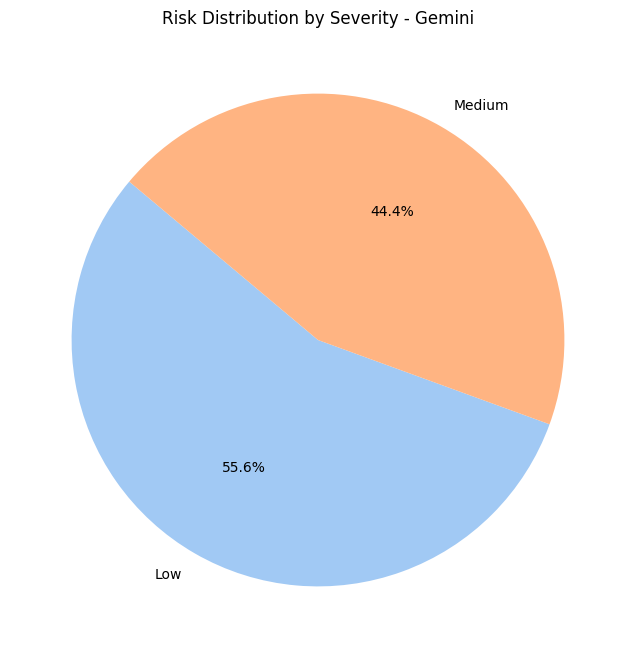

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pie Chart: Risk Distribution by Severity
plt.figure(figsize=(8, 8))
plt.pie(pie_data['Risk_Count'], labels=pie_data['Severity'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Risk Distribution by Severity - Gemini')
plt.show()

C:\Users\zsj36405\AppData\Local\Temp\ipykernel_3972\2578080127.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SDLC_Phase', y='Risk_Count', data=bar_data, palette='viridis')


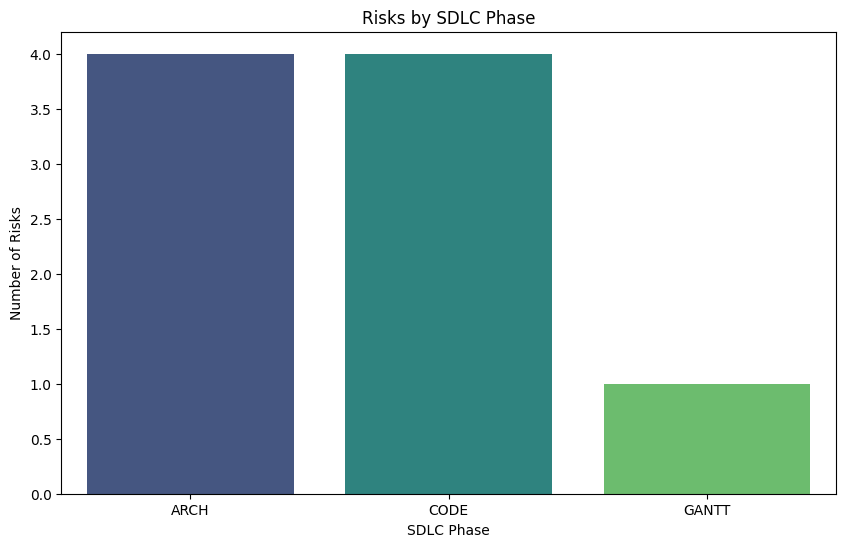

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Bar Chart: Risks by SDLC Phase
plt.figure(figsize=(10, 6))
sns.barplot(x='SDLC_Phase', y='Risk_Count', data=bar_data, palette='viridis')
plt.title('Risks by SDLC Phase')
plt.xlabel('SDLC Phase')
plt.ylabel('Number of Risks')
plt.show()

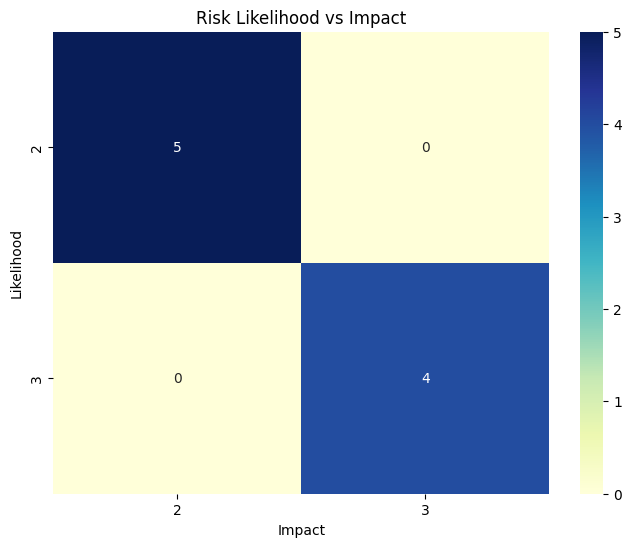

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Heatmap: Risk Likelihood vs Impact
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Risk Likelihood vs Impact')
plt.xlabel('Impact')
plt.ylabel('Likelihood')
plt.show()

<Figure size 1200x600 with 0 Axes>

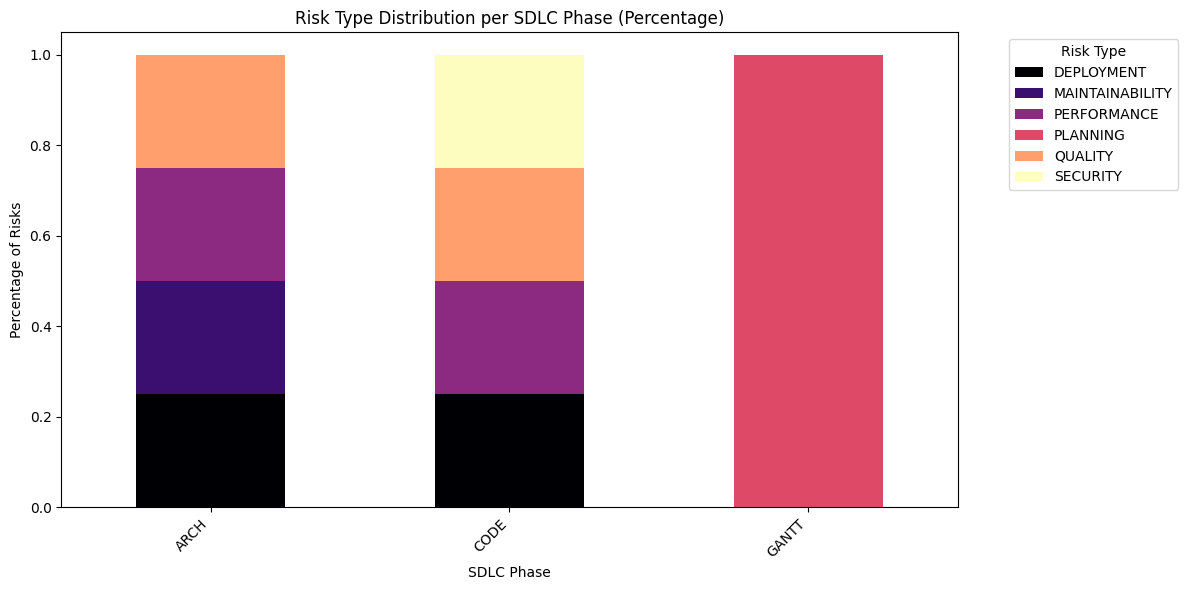

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the risk assessment data
data = [
    {
        "Risk_ID": "ARCH-PERFORMANCE-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "PERFORMANCE",
        "Description": "FAISS on disk could become a bottleneck for large datasets, impacting search speed.",
        "Rationale": "Scalability considerations mention 'FAISS on Disk: Avoids RAM overload when scaling beyond 5K recipes', implying potential performance issues."
    },
    {
        "Risk_ID": "ARCH-DEPLOYMENT-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "DEPLOYMENT",
        "Description": "Deploying and managing separate components (PostgreSQL, FAISS, FastAPI) on the cloud introduces complexity.",
        "Rationale": "Deployment plan involves multiple services (AWS/GCP, EC2, Google Cloud Run), increasing deployment complexity."
    },
    {
        "Risk_ID": "ARCH-MAINTAIN-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "MAINTAINABILITY",
        "Description": "Maintaining embeddings and database consistency may become complex over time.",
        "Rationale": "Separate storage for FAISS embeddings and PostgreSQL data requires careful synchronization during maintenance."
    },
    {
        "Risk_ID": "ARCH-QUALITY-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "QUALITY",
        "Description": "Insufficient testing of the LLM integration could lead to unpredictable results.",
        "Rationale": "The architecture includes LLM integration as a fallback, but testing details are not specified, posing a quality risk."
    },
    {
        "Risk_ID": "CODE-DB-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "QUALITY",
        "Description": "Insufficient validation in `db_push.py` may lead to data integrity issues.",
        "Rationale": "The script mentions 'Validate the csv rows' but doesn't detail thorough validation, increasing the risk of bad data entering the database."
    },
    {
        "Risk_ID": "CODE-PERF-01",
        "Severity": "Medium",
        "Likelihood": 3,
        "Impact": 3,
        "Risk_Type": "PERFORMANCE",
        "Description": "Large datasets in `create_faiss_index.py` could cause memory issues during embedding creation.",
        "Rationale": "The script loads data from the DB and creates embeddings, which can be memory-intensive for large datasets."
    },
    {
        "Risk_ID": "CODE-DEPLOY-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "DEPLOYMENT",
        "Description": "Hardcoded paths in `config_reader.py` may cause deployment failures.",
        "Rationale": "The script uses a hardcoded path: `BASE_PATH = os.path.expanduser(\"~/Desktop\")`, which might not be valid in different environments."
    },
    {
        "Risk_ID": "CODE-SECURITY-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "SECURITY",
        "Description": "Storing the Unsplash API key directly in `fetch_images.py` poses a security risk.",
        "Rationale": "The script directly stores the Unsplash API key: `ACCESS_KEY = config_dict.get(\"unsplash_access_key\", '')`, which could be exposed."
    },
    {
        "Risk_ID": "GANTT-PLANNING-01",
        "Severity": "Low",
        "Likelihood": 2,
        "Impact": 2,
        "Risk_Type": "PLANNING",
        "Description": "The Gantt chart lacks detail, potentially leading to scheduling issues.",
        "Rationale": "The Gantt chart provides a high-level overview but lacks specific task dependencies and timelines."
    }
]

# Create DataFrame
df = pd.DataFrame(data)

# Extract SDLC phase from Risk_ID
df['SDLC_Phase'] = df['Risk_ID'].apply(lambda x: x.split('-')[0])

# Create a numerical Severity Score
severity_order = {"Low": 1, "Medium": 2, "High": 3}  # Map "High" to 3, "Medium" to 2, "Low" to 1
df['Severity_Score'] = df['Severity'].map(severity_order)

# 1. Pie Chart Data
pie_data = df.groupby('Severity').size().reset_index(name='Risk_Count')
pie_data['Percentage'] = pie_data['Risk_Count'] / pie_data['Risk_Count'].sum()

# 2. Bar Chart Data
bar_data = df.groupby('SDLC_Phase').size().reset_index(name='Risk_Count')

# 3. Heatmap Data
heatmap_data = df.groupby(['Likelihood', 'Impact']).size().reset_index(name='Risk_Count')
heatmap_data = heatmap_data.pivot(index='Likelihood', columns='Impact', values='Risk_Count').fillna(0)

# 4. Stacked Bar Chart Data
stacked_bar_data = df.groupby(['SDLC_Phase', 'Risk_Type']).size().reset_index(name='Risk_Count')
stacked_bar_data = stacked_bar_data.pivot(index='SDLC_Phase', columns='Risk_Type', values='Risk_Count').fillna(0)

# Calculate percentages
stacked_bar_data_pct = stacked_bar_data.div(stacked_bar_data.sum(axis=1), axis=0)

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
stacked_bar_data_pct.plot(kind='bar', stacked=True, colormap='magma', figsize=(12, 6))
plt.title('Risk Type Distribution per SDLC Phase (Percentage)')
plt.xlabel('SDLC Phase')
plt.ylabel('Percentage of Risks')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Risk Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [11]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',